In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [2]:
df=pd.read_csv(r"Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Id']=le.fit_transform(df['Id'])
df['SepalLengthCm']=le.fit_transform(df['SepalLengthCm'])
df['SepalWidthCm']=le.fit_transform(df['SepalWidthCm'])
df['PetalLengthCm']=le.fit_transform(df['PetalLengthCm'])
df['PetalWidthCm']=le.fit_transform(df['PetalWidthCm'])
df['Species']=le.fit_transform(df['Species'])

In [5]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,8,14,4,1,0
1,1,6,9,4,1,0
2,2,4,11,3,1,0
3,3,3,10,5,1,0
4,4,7,15,4,1,0
...,...,...,...,...,...,...
145,145,24,9,28,19,2
146,146,20,4,26,15,2
147,147,22,9,28,16,2
148,148,19,13,30,19,2


In [6]:
from sklearn.model_selection import train_test_split
x=df.drop('Species',axis=1)
y=df['Species']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [9]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [10]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
error_rate
print(f"minimum rate={min(error_rate)}at k={error_rate.index(min(error_rate))}")

minimum rate=0.0at k=0


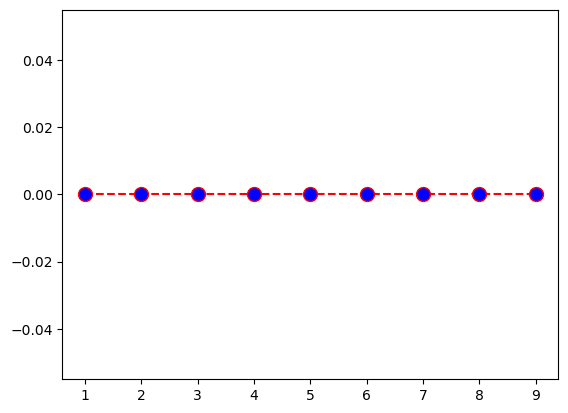

In [11]:
plt.plot(range(1, 10), error_rate, color="red",linestyle="dashed",marker="o",markerfacecolor="blue",markersize=10)
# x = range(1,10)
# y = error_rate
# plt.plot(x,y)
plt.show()